In [37]:
#this dataset is from kaggle. link : https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification
from google.colab import files

uploaded = files.upload()

Saving archive (3).zip to archive (3) (1).zip


In [38]:
import zipfile
import os

zip_file_name = 'archive (3).zip'
extract_to = 'train'

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

data_dir = os.path.join(extract_to, 'train')
classes = os.listdir(data_dir)

file_paths = []
labels = []

for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    images = os.listdir(class_path)
    for image_name in images:
        file_paths.append(os.path.join(class_path, image_name))
        labels.append(class_name)

train_files, test_files, train_labels, test_labels = train_test_split(file_paths, labels, test_size=0.2, random_state=42)

len(train_files), len(test_files)

(445, 112)

In [40]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

#preprocessing images for the model
def preprocess_images(file_paths, labels):
    images = []
    for file_path in file_paths:
        img = load_img(file_path, target_size=(150, 150))
        img_array = img_to_array(img)
        images.append(img_array)
    return np.array(images), np.array(labels)

X_train, y_train = preprocess_images(train_files, train_labels)
X_val, y_val = preprocess_images(test_files, test_labels)

In [41]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
y_train = label_enc.fit_transform(y_train)
y_val = label_enc.transform(y_val)

# Normalizing images
X_train = X_train / 255
X_val = X_val / 255

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

model = KNeighborsClassifier()
model.fit(X_train_flat, y_train)
y_pred = model.predict(X_val_flat)

accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
precision = precision_score(y_val, y_pred, average='weighted')
accuracy, f1, recall , precision
#model had %66 accuracy on the training data.

(0.6607142857142857,
 0.6614836410754777,
 0.6607142857142857,
 0.6626728110599078)

In [43]:
X_train_flat.shape

(445, 67500)

In [44]:
X_val_flat.shape

(112, 67500)

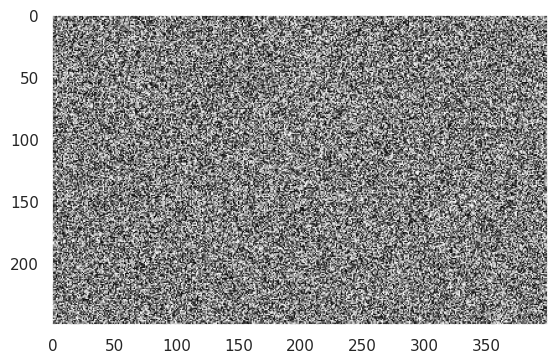

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

X_train_flat = np.random.rand(10, 400 * 250) #images are 400*250 pixel size

image = X_train_flat[6].reshape((250, 400))

plt.figure()
plt.imshow(image, cmap='gray')
plt.grid(False)
plt.show()

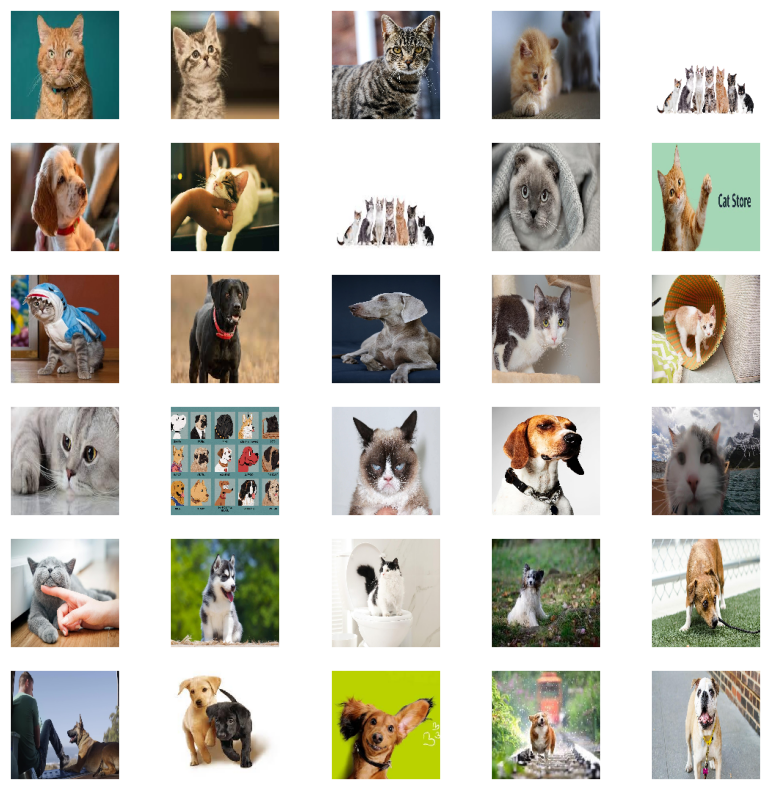

In [46]:
plt.figure(figsize=(10,10))

for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

In [47]:
X_train_flat.shape

(10, 100000)

In [48]:
cm = confusion_matrix(y_val, y_pred)
cm

array([[44, 20],
       [18, 30]])

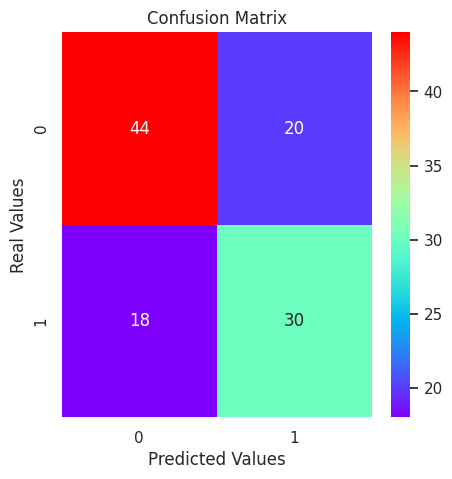

In [49]:
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True,fmt="d", cmap="rainbow", xticklabels=np.arange(2), yticklabels=np.arange(2))
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.title('Confusion Matrix')
plt.show()
#as we can see from the heatmap : 70/112 (0.66) accuracy.

In [50]:
misclassification_rate = 1 - accuracy
misclassification_rate
#misclassification rate is the opposite of accuracy

0.3392857142857143

In [51]:
#Now Let's test the model on a dataset it has never seen before
#test dataset was already seperated in zip for us to use it.
data_test_dir = os.path.join(extract_to, 'test')
classes = os.listdir(data_test_dir)
classes

['cats', 'dogs']

In [52]:
def preprocess_test_images(data_dir):
    file_paths = []
    labels = []
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        images = os.listdir(class_path)
        for image_name in images:
            file_paths.append(os.path.join(class_path, image_name))
            labels.append(class_name)
    return file_paths, labels

In [53]:
test_files, test_labels = preprocess_test_images(data_test_dir)

#We need to convert the labels into numerical format
y_test = label_enc.transform(test_labels)

In [54]:
def preprocess_images(file_paths):
    images = []
    for file_path in file_paths:
        img = load_img(file_path, target_size=(150, 150))
        img_array = img_to_array(img)
        images.append(img_array)
    return np.array(images)

In [55]:
X_test = preprocess_images(test_files)
X_test = X_test / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [56]:
y_test_pred = model.predict(X_test_flat)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')

test_accuracy, test_f1, test_recall, test_precision

(0.55, 0.5499770396448799, 0.55, 0.5500102061645235)

In [57]:
#As we see here , generally train accuracy is higher than test accuracy (test:0.55 - train:0.66)

In [58]:
for i, pred in enumerate(y_test_pred):
    if pred == 1:
        print(f"Image {i}: Prediction: dog")
    else:
        print(f"Image {i}: Prediction: cat")

Image 0: Prediction: cat
Image 1: Prediction: dog
Image 2: Prediction: dog
Image 3: Prediction: dog
Image 4: Prediction: cat
Image 5: Prediction: dog
Image 6: Prediction: dog
Image 7: Prediction: cat
Image 8: Prediction: cat
Image 9: Prediction: dog
Image 10: Prediction: dog
Image 11: Prediction: dog
Image 12: Prediction: dog
Image 13: Prediction: cat
Image 14: Prediction: dog
Image 15: Prediction: cat
Image 16: Prediction: cat
Image 17: Prediction: dog
Image 18: Prediction: dog
Image 19: Prediction: cat
Image 20: Prediction: dog
Image 21: Prediction: cat
Image 22: Prediction: cat
Image 23: Prediction: cat
Image 24: Prediction: dog
Image 25: Prediction: cat
Image 26: Prediction: dog
Image 27: Prediction: cat
Image 28: Prediction: cat
Image 29: Prediction: cat
Image 30: Prediction: dog
Image 31: Prediction: cat
Image 32: Prediction: dog
Image 33: Prediction: dog
Image 34: Prediction: dog
Image 35: Prediction: cat
Image 36: Prediction: cat
Image 37: Prediction: cat
Image 38: Prediction: 